# Pre-processing and EDA on CASAS dataset (Kyoto)

In [1]:
from datetime import timedelta
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean,stdev
import numpy as np
from collections import deque 
import pandas as pd
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import cufflinks as cf
cf.go_offline()

In [4]:
def get_datetime(newVal):
    stuff = re.split('\s+', newVal)
    date = re.split('-', stuff[0])
    time = re.split(':', stuff[1])
    sec = []
    if re.search('\.', time[2]) == None:
        sec.append(time[2])
        sec.append("0")
    else:
        sec = re.split('\.', time[2])
        dt = datetime.datetime(int(date[0]),
                          int(date[1]),
                          int(date[2]),
                          int(time[0]),
                          int(time[1]),
                          int(sec[0]),
                          int(sec[1]))
    return dt

In [5]:
filtered = []
inp = open("./combined_dataset")
for line in inp:
    x = str(str(line).strip()).split()
    if len(x) > 5:
        filtered.append(x)
inp.close()
print(filtered[5:15])

[['2009-02-07', '08:49:29.805259', 'M47', 'ON', 'R2_sleep', 'end'], ['2009-02-06', '07:33:49.97174', 'M32', 'OFF', 'R1_bed_to_toilet', 'begin'], ['2009-02-06', '07:53:46.392519', 'M38', 'ON', 'R1_bed_to_toilet', 'end'], ['2009-02-06', '08:25:08.691299', 'M48', 'ON', 'R2_bed_to_toilet', 'begin'], ['2009-02-06', '08:27:28.34348', 'M50', 'ON', 'R2_bed_to_toilet', 'end'], ['2009-02-06', '07:34:24.770119', 'M37', 'ON', 'R1_groom', 'begin'], ['2009-02-06', '07:54:01.92629', 'M35', 'OFF', 'R1_groom', 'end'], ['2009-02-06', '10:08:47.67346', 'M50', 'ON', 'R2_groom', 'begin'], ['2009-02-06', '10:39:50.652339', 'M50', 'ON', 'R2_groom', 'end'], ['2009-02-06', '08:03:09.246439', 'M30', 'ON', 'R1_breakfast', 'begin']]


In [6]:
df=pd.DataFrame(filtered,columns=["Date","Time","Sensor","Status","Activity","Begin_or_End"])
df.head()

,Date,Time,Sensor,Status,Activity,Begin_or_End
0,2009-02-06,17:15:22.42803,M41,ON,R2_work_at_computer,begin
1,2009-02-06,17:47:16.229419,M45,OFF,R2_work_at_computer,end
2,2009-02-06,23:52:40.288779,M36,ON,R1_sleep,begin
3,2009-02-07,08:23:03.170219,M35,OFF,R1_sleep,end
4,2009-02-06,23:54:37.05795,M48,ON,R2_sleep,begin


In [7]:
df.dtypes

Date            object
Time            object
Sensor          object
Status          object
Activity        object
Begin_or_End    object
dtype: object

In [8]:
df.shape

(11076, 6)

In [9]:
df['Activity'].value_counts()

R1_Personal_Hygiene             1100
R2_Personal_Hygiene             1068
R1_Work                         1010
R1_work                          888
R2_Work                          864
R2_work                          704
R2_Sleep                         610
R1_Sleep                         548
Cooking                          398
R2_Meal_Preparation              368
R1_Leave_Home                    294
R1_Meal_Preparation              262
R2_Watch_TV                      234
R1_Watch_TV                      220
R1_sleep                         174
R1_Enter_Home                    170
R2_Eating                        142
R2_Leave_Home                    136
R2_sleep                         122
R1_work_at_computer              116
R2_Bathing                       110
R2_Enter_Home                    104
R1_wakeup                         96
Grooming                          94
R2_work_at_computer               90
R1_groom                          90
R1_shower                         82
R

In [10]:
df['Activity']=df['Activity'].str.lower()
df.loc[df.Activity=='clean', 'Activity'] = 'cleaning'
len(df['Activity'].unique())

45

In [11]:
df['Sensor'].value_counts()

M037    1303
M045     985
M007     681
M017     631
D005     536
        ... 
T002       1
M05        1
T005       1
M25        1
L008       1
Name: Sensor, Length: 117, dtype: int64

In [12]:
df.dtypes

Date            object
Time            object
Sensor          object
Status          object
Activity        object
Begin_or_End    object
dtype: object

In [13]:
print(len(df['Sensor'].unique()))
print(sorted(df['Sensor'].unique()))

for i in range(df.shape[0]):
    if len(df.iloc[i,2])==3:
        df.iloc[i,2]=df.iloc[i,2][0:1]+'0'+df.iloc[i,2][1:]
print(len(df['Sensor'].unique()))
print(sorted(df['Sensor'].unique()))

117
['AD1-A', 'AD1-B', 'D001', 'D003', 'D004', 'D005', 'D006', 'D014', 'D015', 'I03', 'L003', 'L005', 'L007', 'L008', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007', 'M008', 'M009', 'M01', 'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M017', 'M018', 'M019', 'M02', 'M020', 'M021', 'M022', 'M023', 'M024', 'M025', 'M026', 'M027', 'M028', 'M029', 'M030', 'M031', 'M032', 'M033', 'M034', 'M035', 'M036', 'M037', 'M038', 'M039', 'M04', 'M040', 'M041', 'M042', 'M043', 'M044', 'M045', 'M046', 'M047', 'M048', 'M049', 'M05', 'M050', 'M051', 'M06', 'M07', 'M08', 'M09', 'M10', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M21', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50', 'M51', 'P001', 'T001', 'T002', 'T003', 'T004', 'T005']
71
['AD1-A', 'AD1-B', 'D001', 'D003', 'D004', 'D005', 'D006', 'D014', 'D015', 'I003', 'L003', 'L005', 'L

In [14]:
df.dtypes

Date            object
Time            object
Sensor          object
Status          object
Activity        object
Begin_or_End    object
dtype: object

In [15]:
df["Date_Time"] = df["Date"]+' '+df["Time"]

In [16]:
df["Date_Time"]=df["Date_Time"].apply(lambda x:get_datetime(x))

In [17]:
df.dtypes

Date                    object
Time                    object
Sensor                  object
Status                  object
Activity                object
Begin_or_End            object
Date_Time       datetime64[ns]
dtype: object

In [18]:
df['Date']=pd.to_datetime(df['Date'])

In [19]:
df["Weekday"]=df["Date_Time"].apply(lambda x: x.strftime("%A"))

In [20]:
df.sort_values(by=['Date_Time'], inplace=True, ascending=True,ignore_index=True)
df.head()

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
0,2009-02-02,07:15:16.575809,M035,ON,r1_bed_to_toilet,begin,2009-02-02 07:15:16.575809,Monday
1,2009-02-02,07:21:03.792759,M041,OFF,r1_bed_to_toilet,end,2009-02-02 07:21:03.792759,Monday
2,2009-02-02,07:21:04.014729,M040,OFF,r1_groom,begin,2009-02-02 07:21:04.014729,Monday
3,2009-02-02,07:38:33.946559,M036,ON,r1_groom,end,2009-02-02 07:38:33.946559,Monday
4,2009-02-02,07:44:12.597919,M049,ON,r2_bed_to_toilet,begin,2009-02-02 07:44:12.597919,Monday


## Activity names cleaning

In [21]:
df['Activity'].value_counts()

r1_work                         1898
r2_work                         1568
r1_personal_hygiene             1100
r2_personal_hygiene             1068
r2_sleep                         732
r1_sleep                         722
cooking                          398
r2_meal_preparation              368
r2_watch_tv                      296
r1_leave_home                    294
r1_meal_preparation              262
r1_watch_tv                      220
r1_enter_home                    170
r2_eating                        142
r2_leave_home                    136
r1_work_at_computer              116
r2_bathing                       110
r2_enter_home                    104
r1_wakeup                         96
grooming                          94
r1_groom                          90
r2_work_at_computer               90
r1_shower                         82
r2_groom                          80
r2_bed_to_toilet                  78
r2_prepare_dinner                 72
r1_breakfast                      68
r

In [22]:
print(df.shape)
df.drop(df[df['Activity']=='r1_housekeeping'].index, inplace = True) 
df.drop(df[df['Activity']=='wash_bathtub'].index, inplace = True) 
print(df.shape)

(11076, 8)
(11072, 8)


In [23]:
df["Weekday"].value_counts()

Monday       1953
Tuesday      1932
Thursday     1862
Wednesday    1851
Friday       1764
Sunday        868
Saturday      842
Name: Weekday, dtype: int64

In [24]:
d=pd.DataFrame()
d['Dates']=list(df['Date'].unique())
d['Dates']=pd.to_datetime(d['Dates'])
d['Months']=d['Dates'].apply(lambda x: x.strftime("%b"))
d['Dates']=d['Dates'].apply(lambda x: x.strftime("%A"))
d['Dates'].value_counts()

Tuesday      48
Monday       48
Wednesday    48
Friday       47
Thursday     46
Saturday     39
Sunday       36
Name: Dates, dtype: int64

### Activity vs Time taken

In [25]:
activities = list(df["Activity"].unique())
activities

['r1_bed_to_toilet',
 'r1_groom',
 'r2_bed_to_toilet',
 'r1_breakfast',
 'r2_breakfast',
 'r2_groom',
 'r2_watch_tv',
 'r1_work_at_computer',
 'r2_work_at_computer',
 'r2_prepare_dinner',
 'r1_sleep',
 'r2_sleep',
 'r2_prepare_lunch',
 'cleaning',
 'r1_work_at_dining_room_table',
 'r1_wakeup',
 'grooming',
 'r1_shower',
 'r1_work',
 'cooking',
 'r2_work',
 'r2_wakeup',
 'r2_shower',
 'bed_toilet_transition',
 'r1_wandering_in_room',
 'r1_bed_toilet_transition',
 'r1_personal_hygiene',
 'r1_bathing',
 'r1_meal_preparation',
 'r2_personal_hygiene',
 'r1_leave_home',
 'r2_wandering_in_room',
 'r2_meal_preparation',
 'r2_eating',
 'r2_bathing',
 'r2_leave_home',
 'r1_enter_home',
 'r1_eating',
 'r1_watch_tv',
 'r2_bed_toilet_transition',
 'r2_enter_home',
 'r1_sleeping_not_in_bed',
 'r2_sleeping_not_in_bed']

In [26]:
unequal = 0
for i in activities:
    print(i)
    a = len(df[df['Activity']==i])
    df_i=df[df['Activity']==i]
    b_c = len(df_i[df_i['Begin_or_End']=='begin'])
    e_c = len(df_i[df_i['Begin_or_End']=='end'])
    print(a,b_c,e_c)
    print(b_c == e_c)
    if b_c != e_c:
        unequal+=1
print(unequal)

r1_bed_to_toilet
68 34 34
True
r1_groom
90 45 45
True
r2_bed_to_toilet
78 39 39
True
r1_breakfast
68 34 34
True
r2_breakfast
58 29 29
True
r2_groom
80 40 40
True
r2_watch_tv
296 148 148
True
r1_work_at_computer
116 58 58
True
r2_work_at_computer
90 45 45
True
r2_prepare_dinner
72 36 36
True
r1_sleep
722 361 361
True
r2_sleep
732 366 366
True
r2_prepare_lunch
58 29 29
True
cleaning
60 30 30
True
r1_work_at_dining_room_table
18 9 9
True
r1_wakeup
96 48 48
True
grooming
94 47 47
True
r1_shower
82 41 41
True
r1_work
1898 949 949
True
cooking
398 199 199
True
r2_work
1568 784 784
True
r2_wakeup
50 25 25
True
r2_shower
56 28 28
True
bed_toilet_transition
4 2 2
True
r1_wandering_in_room
30 15 15
True
r1_bed_toilet_transition
48 24 24
True
r1_personal_hygiene
1100 550 550
True
r1_bathing
62 31 31
True
r1_meal_preparation
262 131 131
True
r2_personal_hygiene
1068 534 534
True
r1_leave_home
294 147 147
True
r2_wandering_in_room
10 5 5
True
r2_meal_preparation
368 184 184
True
r2_eating
142 71 71

### The code is to check the number of begins and ends for each activity.

In [27]:
## The condition in the below code  delta>0 and delta<1440 is to ensure that we 
## are considering an 24 hr time interval for any activity

In [28]:
time_taken={}
for i in activities:
    time_taken[i]=[]
    df_temp=df[df["Activity"]==i]
    df_begin = df_temp[df_temp["Begin_or_End"]=="begin"]
    df_end = df_temp[df_temp["Begin_or_End"]=="end"]
    if df_begin.iloc[0,6]<df_end.iloc[0,6]:
        for j in range(min(len(df_begin),len(df_end))):
            delta = (df_end.iloc[j,6]-df_begin.iloc[j,6]).total_seconds()/60
            if delta>0 and delta<1440:
                time_taken[i].append(delta)
    else:
        for j in range(1,min(len(df_begin),len(df_end))-1):
            delta = (df_end.iloc[j-1,6]-df_begin.iloc[j,6]).total_seconds()/60
            if delta>0 and delta<1440:
                time_taken[i].append(delta)

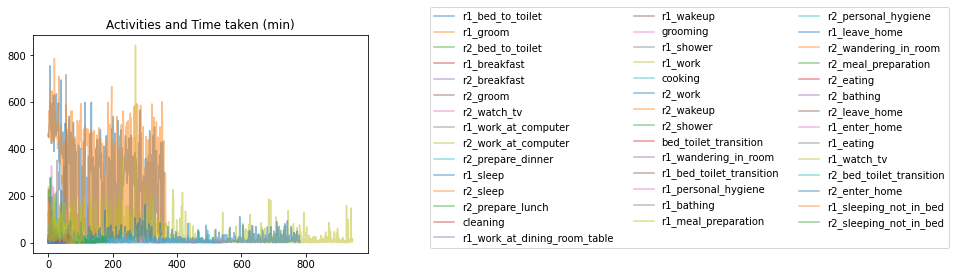

In [29]:
for i in activities:
    plt.plot(time_taken[i],label=i,alpha=0.5)
plt.title('Activities and Time taken (min)')
plt.legend(ncol=3,loc='lower right',bbox_to_anchor=(2.75,0))

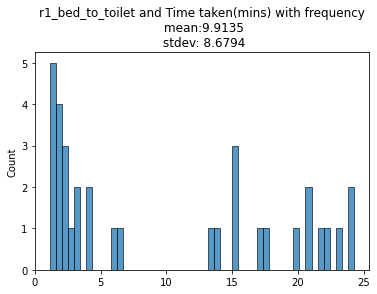

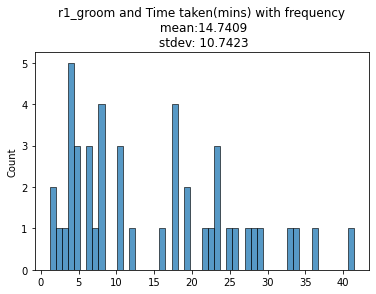

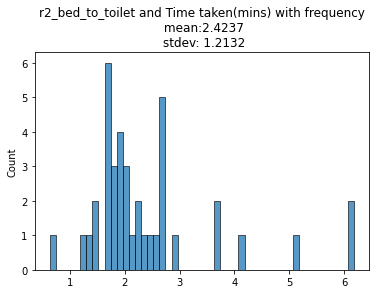

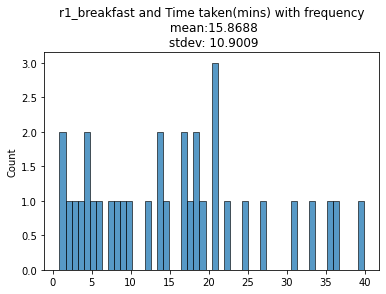

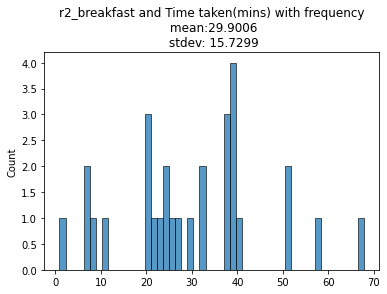

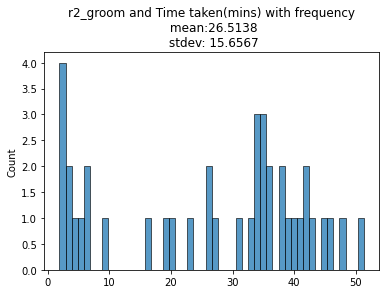

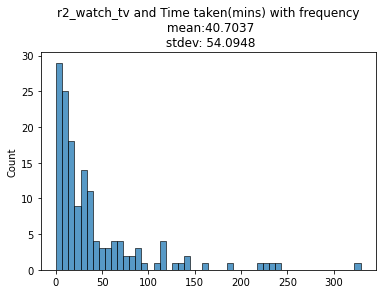

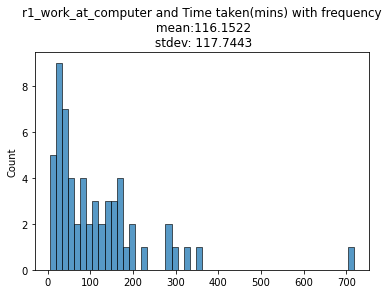

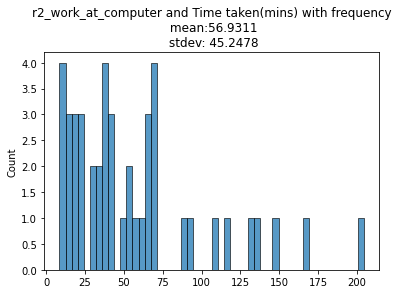

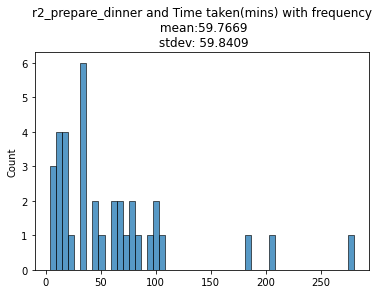

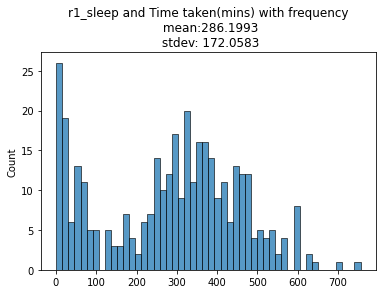

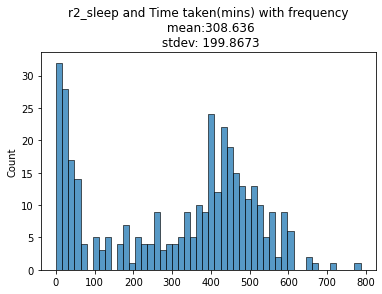

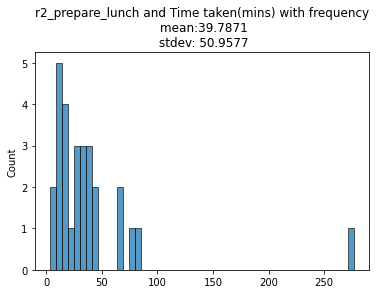

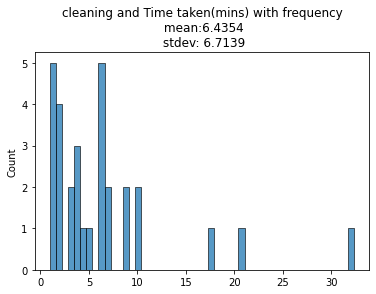

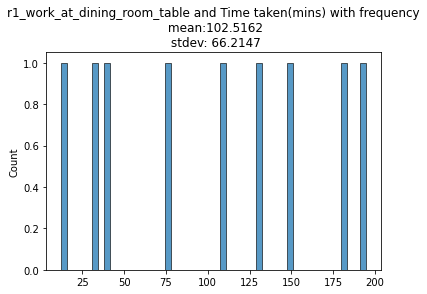

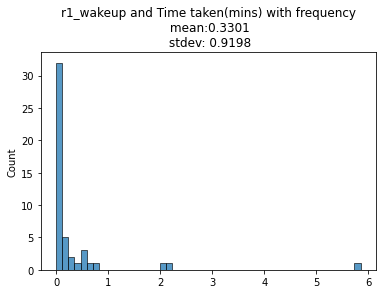

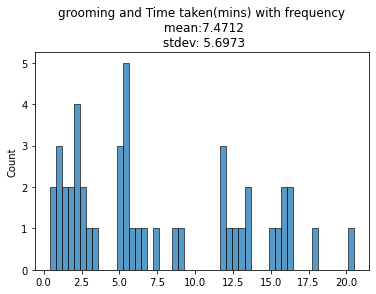

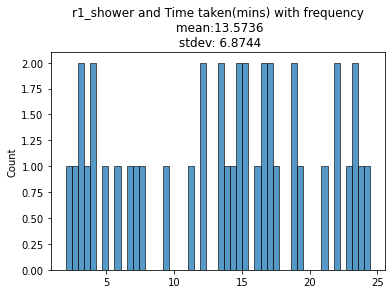

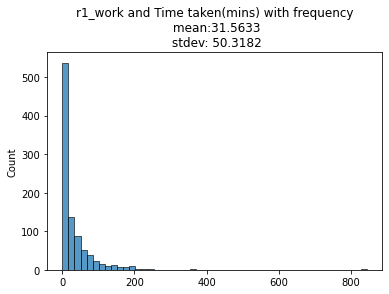

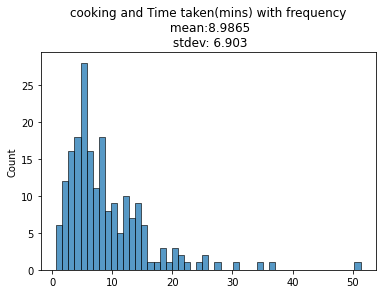

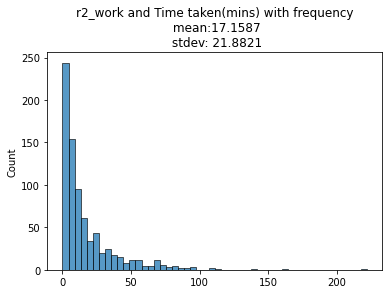

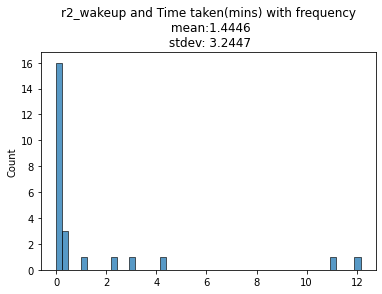

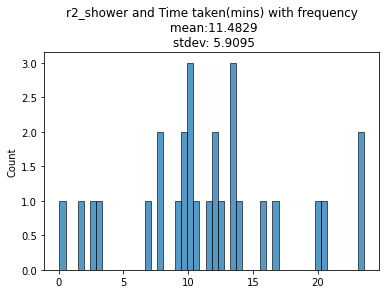

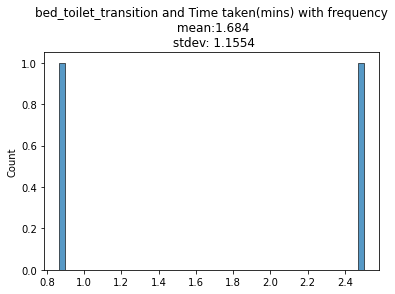

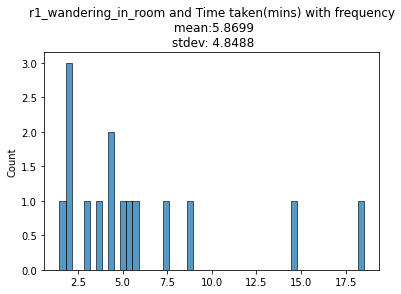

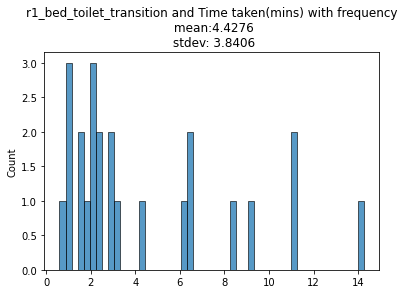

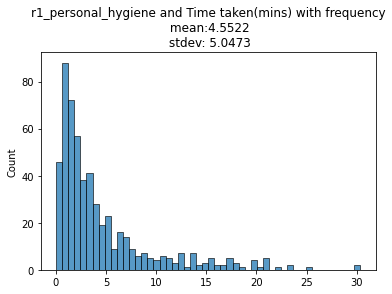

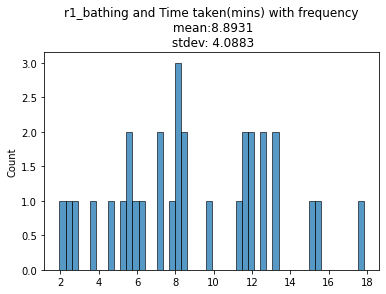

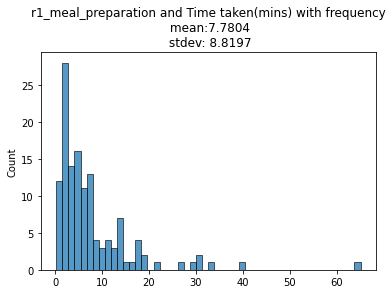

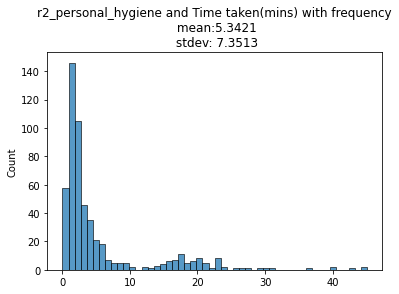

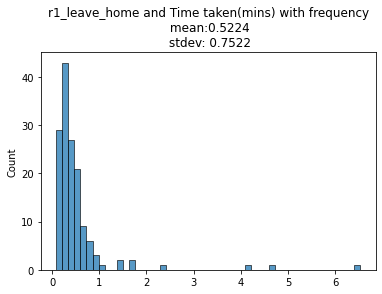

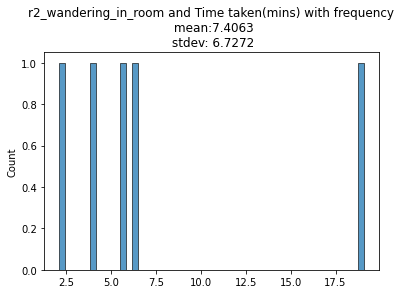

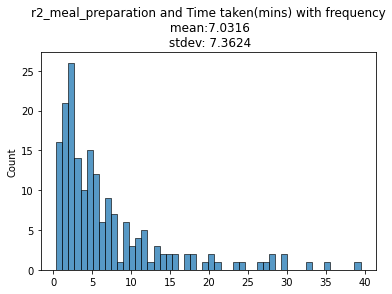

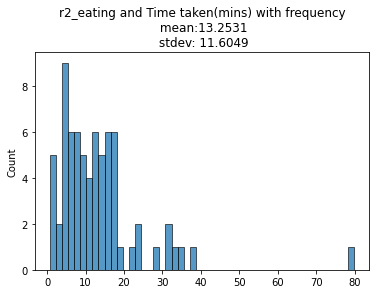

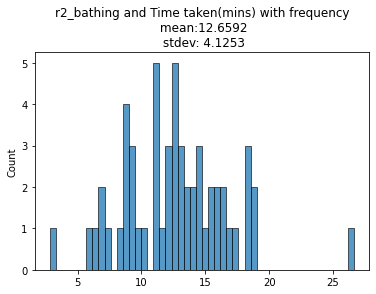

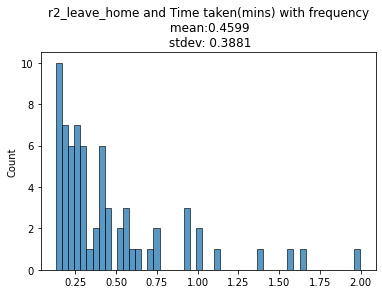

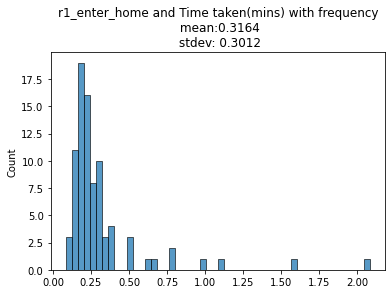

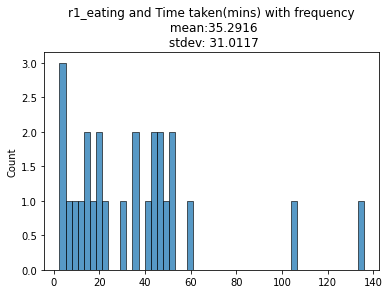

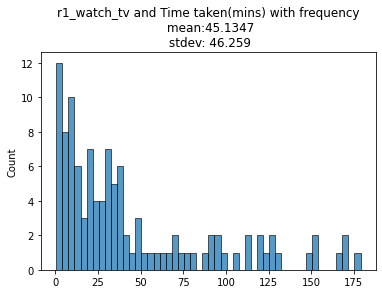

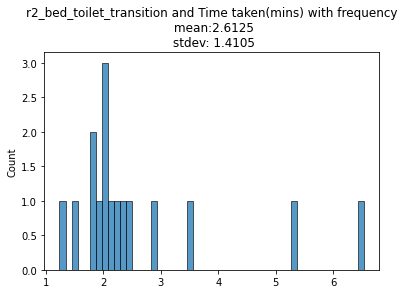

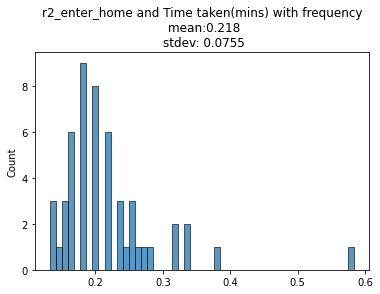

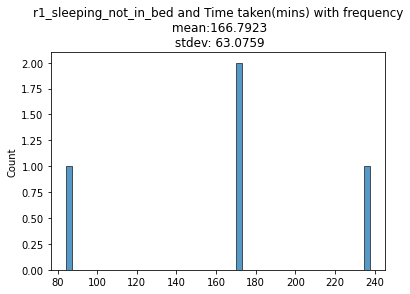

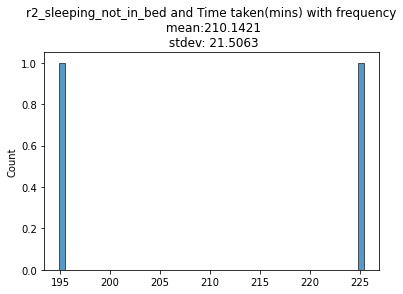

In [30]:
for i in activities:
    if len(time_taken[i])>1:
        sns.histplot(time_taken[i],edgecolor = 'black',bins = 50)
        plt.title(i+' and Time taken(mins) with frequency\n mean:' +str(round(mean(time_taken[i]),4))+'\n stdev: '+str(round(stdev(time_taken[i]),4)))
        plt.show()

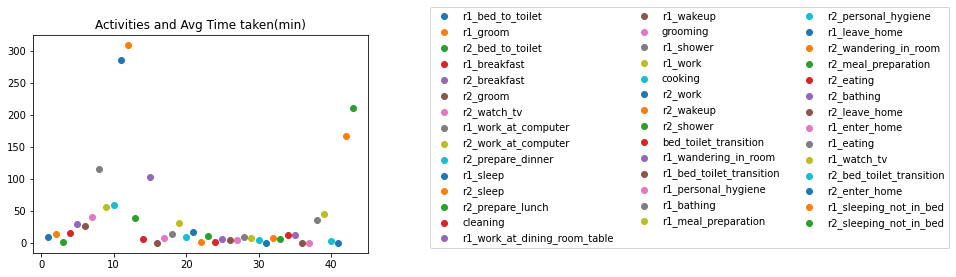

In [31]:
for i in range(len(activities)):
    if len(time_taken[activities[i]])>1:
        plt.scatter(i+1,mean(time_taken[activities[i]]),label=activities[i])
plt.title('Activities and Avg Time taken(min)')
plt.legend(ncol=3,loc='lower right',bbox_to_anchor=(2.75,0))

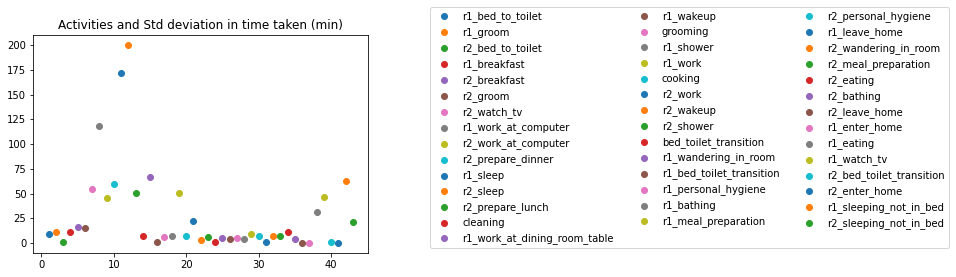

In [32]:
for i in range(len(activities)):
    if len(time_taken[activities[i]])>1:
        plt.scatter(i+1,stdev(time_taken[activities[i]]),label=activities[i])
plt.title('Activities and Std deviation in time taken (min)')
plt.legend(ncol=3,loc='lower right',bbox_to_anchor=(2.75,0))

### Activities vs Usual time they are done

In [33]:
clock_times_weekday={}
clock_times_weekend={}
for i in activities:
    clock_times_weekday[i]=[]
    clock_times_weekend[i]=[]
    for j in range(0,24):
        clock_times_weekday[i].append(0)
        clock_times_weekend[i].append(0)
    df_temp=df[df["Activity"]==i]
    df_begin = df_temp[df_temp["Begin_or_End"]=="begin"]
    for j in range(len(df_begin)):
        if df_begin.iloc[j,7]=='Saturday' or df_begin.iloc[j,7]=='Sunday':
            clock_times_weekend[i][df_begin.iloc[j,6].hour]+=1
        else:
            clock_times_weekday[i][df_begin.iloc[j,6].hour]+=1

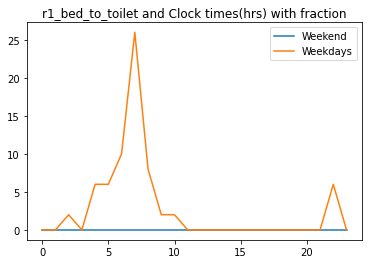

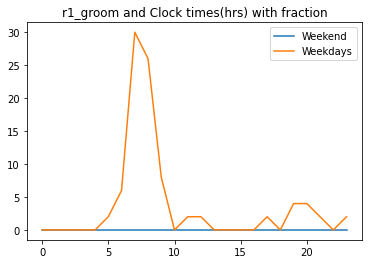

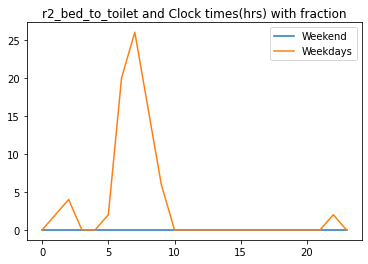

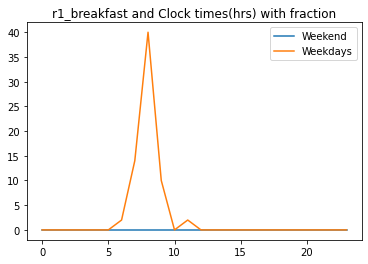

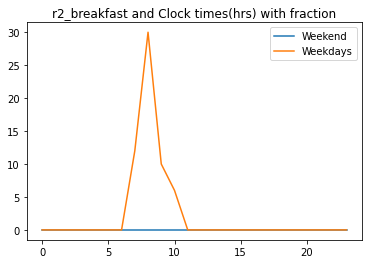

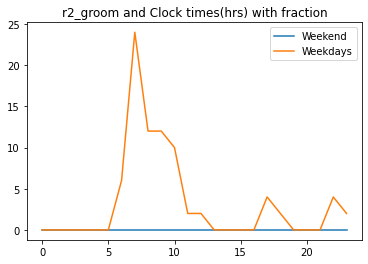

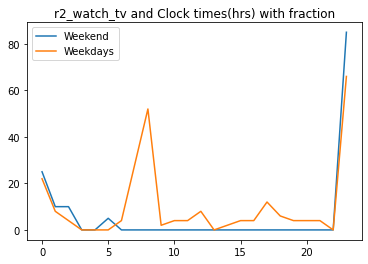

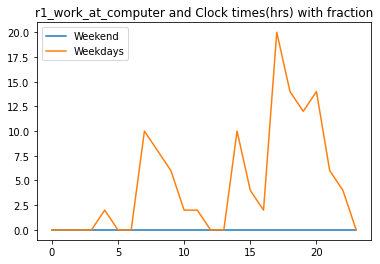

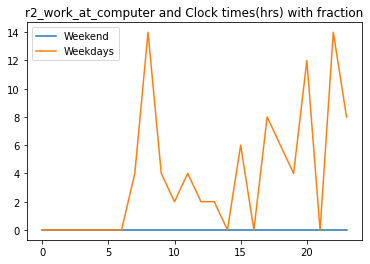

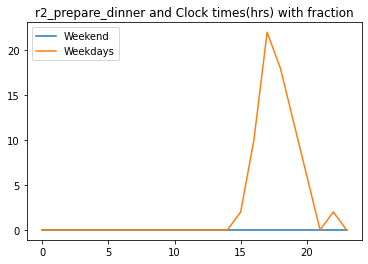

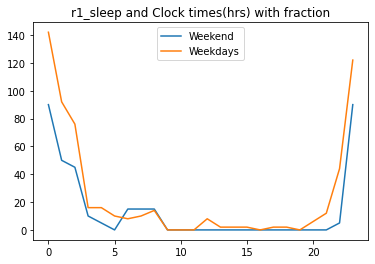

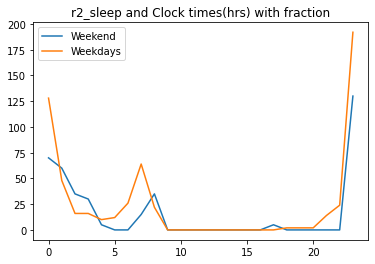

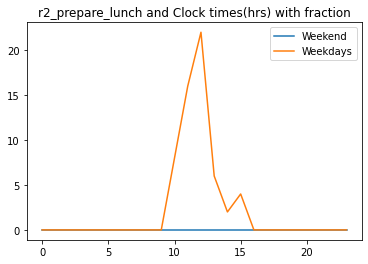

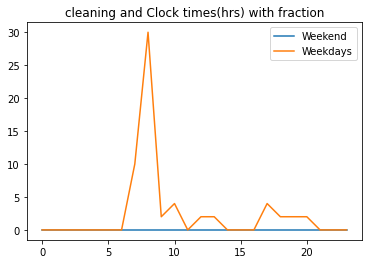

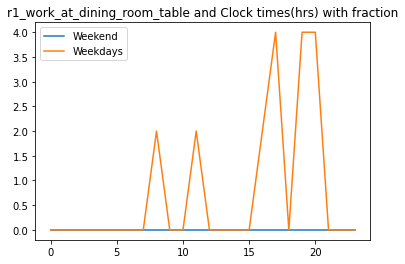

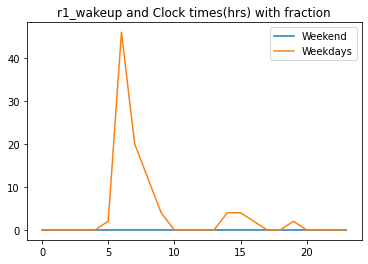

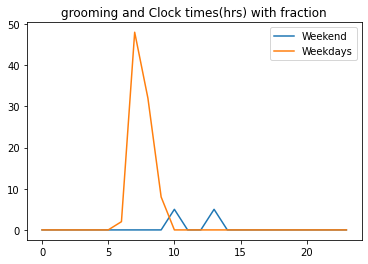

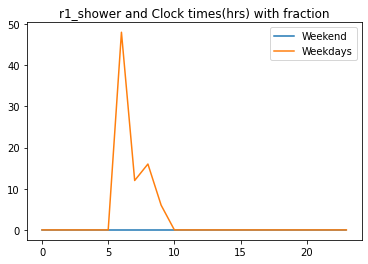

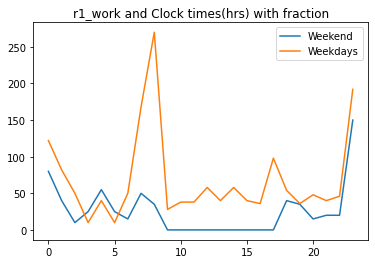

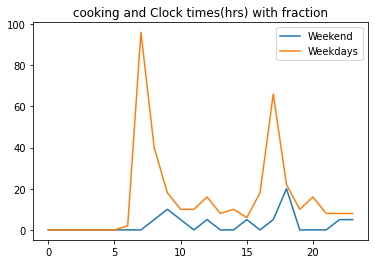

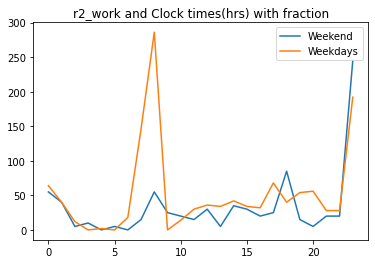

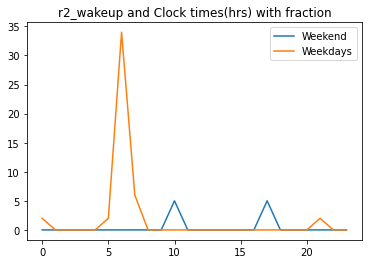

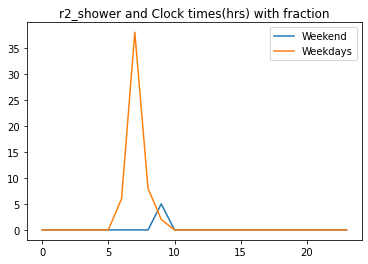

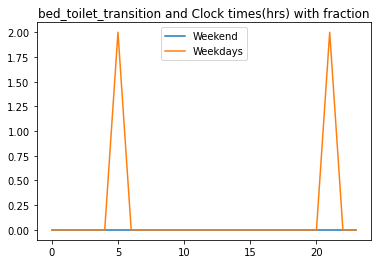

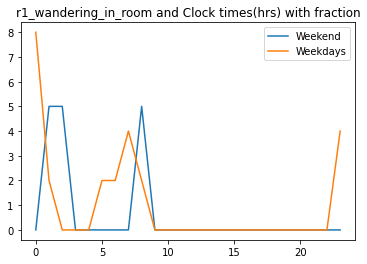

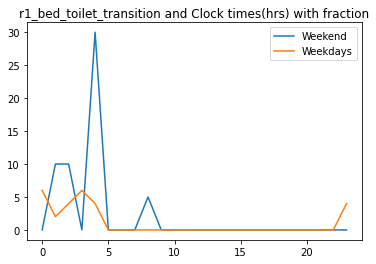

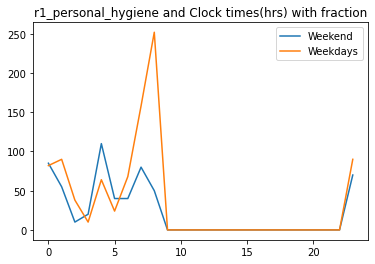

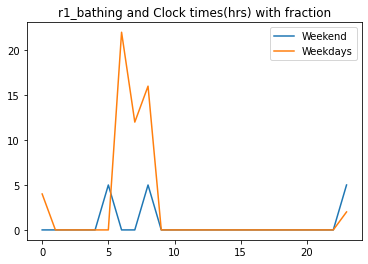

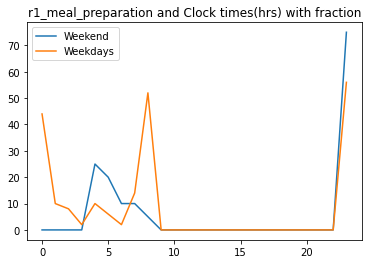

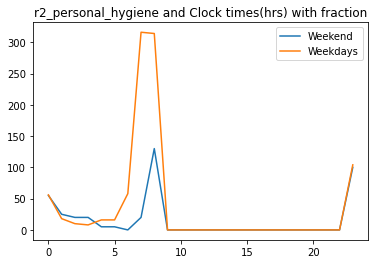

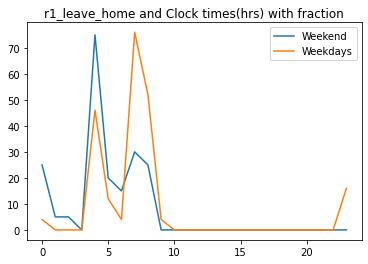

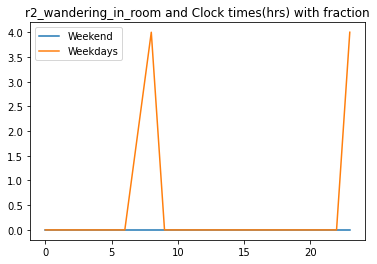

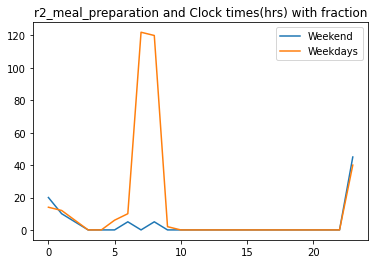

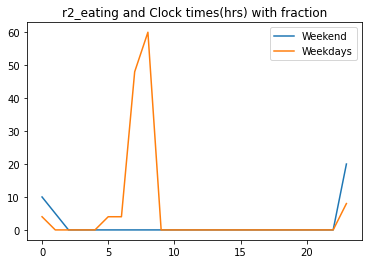

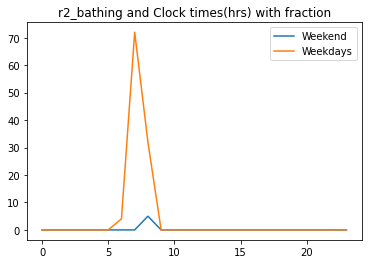

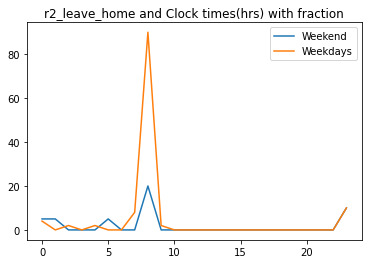

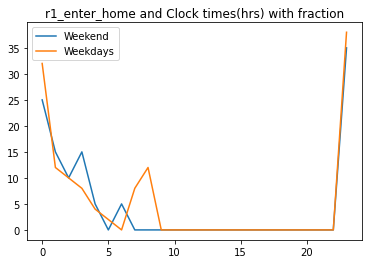

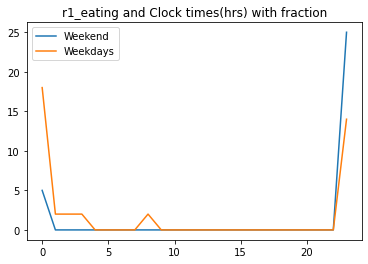

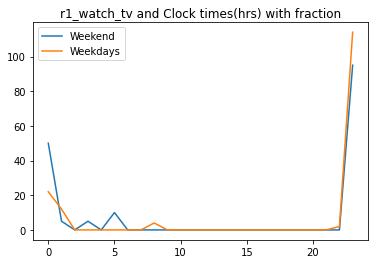

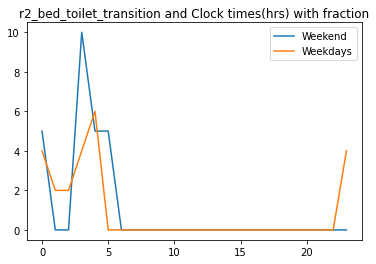

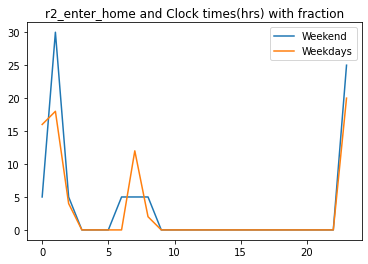

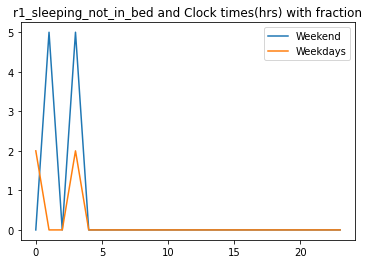

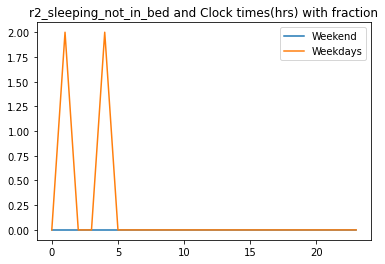

In [34]:
for i in activities:    
    plt.plot(list(range(0,24)),[x*5 for x in clock_times_weekend[i]],label='Weekend')
    plt.plot(list(range(0,24)),[x*2 for x in clock_times_weekday[i]],label='Weekdays')
    plt.legend()
    plt.title(i+' and Clock times(hrs) with fraction')
    plt.show()

## So the weekends are special in a sense where some activities are never done.

In [35]:
most_clock_times_weekdays={}
for i in activities:
    n=max(clock_times_weekday[i])
    if n !=0:
        most_clock_times_weekdays[i]=[i for i, j in enumerate(clock_times_weekday[i]) if j == n]
print("On weekdays")
print(sorted(most_clock_times_weekdays))
print(len(most_clock_times_weekdays))

most_clock_times_weekend={}
for i in activities:
    n=max(clock_times_weekend[i])
    if n !=0:
        most_clock_times_weekend[i]=[i for i, j in enumerate(clock_times_weekend[i]) if j == n]
print("On _weekends")
print(sorted(most_clock_times_weekend))
print(len(most_clock_times_weekend))

On weekdays
['bed_toilet_transition', 'cleaning', 'cooking', 'grooming', 'r1_bathing', 'r1_bed_to_toilet', 'r1_bed_toilet_transition', 'r1_breakfast', 'r1_eating', 'r1_enter_home', 'r1_groom', 'r1_leave_home', 'r1_meal_preparation', 'r1_personal_hygiene', 'r1_shower', 'r1_sleep', 'r1_sleeping_not_in_bed', 'r1_wakeup', 'r1_wandering_in_room', 'r1_watch_tv', 'r1_work', 'r1_work_at_computer', 'r1_work_at_dining_room_table', 'r2_bathing', 'r2_bed_to_toilet', 'r2_bed_toilet_transition', 'r2_breakfast', 'r2_eating', 'r2_enter_home', 'r2_groom', 'r2_leave_home', 'r2_meal_preparation', 'r2_personal_hygiene', 'r2_prepare_dinner', 'r2_prepare_lunch', 'r2_shower', 'r2_sleep', 'r2_sleeping_not_in_bed', 'r2_wakeup', 'r2_wandering_in_room', 'r2_watch_tv', 'r2_work', 'r2_work_at_computer']
43
On _weekends
['cooking', 'grooming', 'r1_bathing', 'r1_bed_toilet_transition', 'r1_eating', 'r1_enter_home', 'r1_leave_home', 'r1_meal_preparation', 'r1_personal_hygiene', 'r1_sleep', 'r1_sleeping_not_in_bed', '

## Almost 17 activities were never performed on weekends.

### Activity to Sensor Relations 

In [36]:
activity_to_sensor = pd.crosstab(df['Activity'],df['Sensor'])

In [37]:
def non_zero(row, columns):
    return list(columns[~(row == 0)])

In [38]:
activity_to_sensor['List_of_Sensors'] = activity_to_sensor.apply(lambda x: non_zero(x, activity_to_sensor.columns), axis=1)

In [39]:
activity_to_sensor

Sensor,AD1-A,AD1-B,D001,D003,D004,D005,D006,D014,D015,I003,...,M049,M050,M051,P001,T001,T002,T003,T004,T005,List_of_Sensors
Activity,,,,,,,,,,,,,,,,,,,,,
bed_toilet_transition,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[M041]
cleaning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[M001, M009, M017, M019, M021]"
cooking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[M017, M018, M045]"
grooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"[M037, M038, P001]"
r1_bathing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,15,0,0,0,2,0,"[M034, M035, M039, M040, M041, P001, T004]"
r1_bed_to_toilet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[M023, M027, M029, M030, M031, M032, M033, M03..."
r1_bed_toilet_transition,0,0,0,0,6,0,0,0,0,0,...,2,9,0,0,0,0,0,0,0,"[D004, M037, M043, M044, M045, M046, M047, M04..."
r1_breakfast,3,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[AD1-A, AD1-B, M013, M014, M015, M016, M017, M..."
r1_eating,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,"[M001, M002, M003, M005, M006, M007, M008, M00..."


## R1 Vs R2 (Comparison)

In [40]:
df_resident1=df[df['Activity'].str.startswith('r1')]
df_resident1.head(10)

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
0,2009-02-02,07:15:16.575809,M035,ON,r1_bed_to_toilet,begin,2009-02-02 07:15:16.575809,Monday
1,2009-02-02,07:21:03.792759,M041,OFF,r1_bed_to_toilet,end,2009-02-02 07:21:03.792759,Monday
2,2009-02-02,07:21:04.014729,M040,OFF,r1_groom,begin,2009-02-02 07:21:04.014729,Monday
3,2009-02-02,07:38:33.946559,M036,ON,r1_groom,end,2009-02-02 07:38:33.946559,Monday
5,2009-02-02,07:45:27.324569,M032,ON,r1_breakfast,begin,2009-02-02 07:45:27.324569,Monday
7,2009-02-02,07:55:23.86221,M016,OFF,r1_breakfast,end,2009-02-02 07:55:23.086221,Monday
14,2009-02-02,14:29:03.19545,M032,ON,r1_work_at_computer,begin,2009-02-02 14:29:03.019545,Monday
17,2009-02-02,17:37:22.21111,M031,OFF,r1_work_at_computer,end,2009-02-02 17:37:22.021111,Monday
20,2009-02-02,19:00:18.038599,M032,OFF,r1_work_at_computer,begin,2009-02-02 19:00:18.038599,Monday
21,2009-02-02,19:30:06.53464,M031,OFF,r1_work_at_computer,end,2009-02-02 19:30:06.053464,Monday


In [41]:
df_resident2=df[df['Activity'].str.startswith('r2')]
df_resident2.head(10)

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
4,2009-02-02,07:44:12.597919,M049,ON,r2_bed_to_toilet,begin,2009-02-02 07:44:12.597919,Monday
6,2009-02-02,07:46:55.1379,M048,OFF,r2_bed_to_toilet,end,2009-02-02 07:46:55.001379,Monday
8,2009-02-02,10:19:25.51405,M050,ON,r2_breakfast,begin,2009-02-02 10:19:25.051405,Monday
9,2009-02-02,10:41:52.005729,M009,ON,r2_breakfast,end,2009-02-02 10:41:52.005729,Monday
10,2009-02-02,10:51:07.09342,M046,ON,r2_groom,begin,2009-02-02 10:51:07.009342,Monday
11,2009-02-02,11:17:06.6219,M049,OFF,r2_groom,end,2009-02-02 11:17:06.006219,Monday
12,2009-02-02,11:41:34.140719,M007,ON,r2_watch_tv,begin,2009-02-02 11:41:34.140719,Monday
13,2009-02-02,12:31:01.550129,M023,ON,r2_watch_tv,end,2009-02-02 12:31:01.550129,Monday
15,2009-02-02,15:23:23.042079,M048,ON,r2_work_at_computer,begin,2009-02-02 15:23:23.042079,Monday
16,2009-02-02,17:36:44.601619,M045,OFF,r2_work_at_computer,end,2009-02-02 17:36:44.601619,Monday


In [42]:
print('R1 - ',len(df_resident1))
print('R2 - ',len(df_resident2))

R1 -  5404
R2 -  5112


In [43]:
clock_times_r1={}
clock_times_r2={}
clock_times_gen={}
for i in activities:
    temp=[]
    for j in range(0,24):
        temp.append(0)
    df_temp=df[df["Activity"]==i]
    df_begin = df_temp[df_temp["Begin_or_End"]=="begin"]
    for j in range(len(df_begin)):
        temp[df_begin.iloc[j,6].hour]+=1
    if i.startswith('r1'):
        clock_times_r1[i]=temp
    elif i.startswith('r2'):
        clock_times_r2[i]=temp
    else:
        clock_times_gen[i]=temp

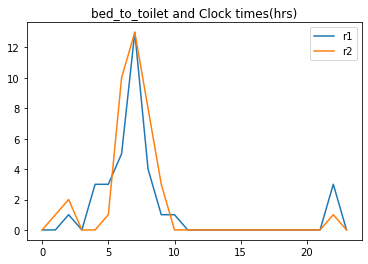

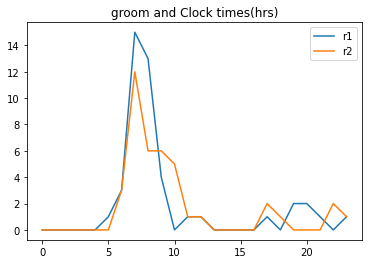

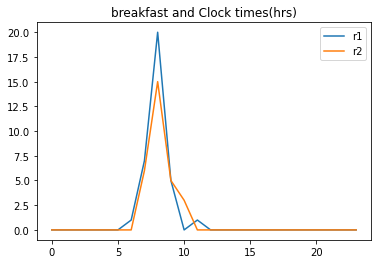

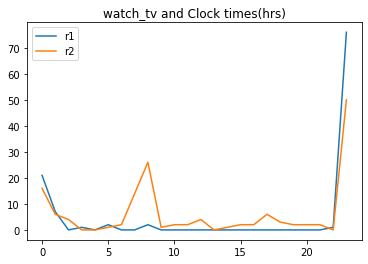

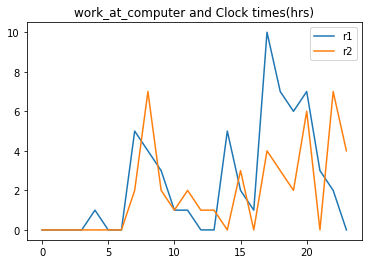

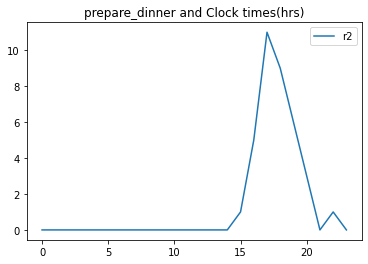

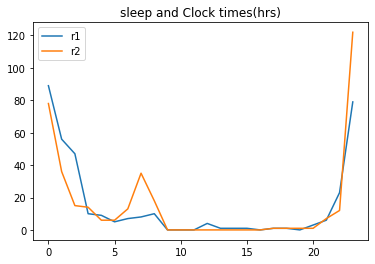

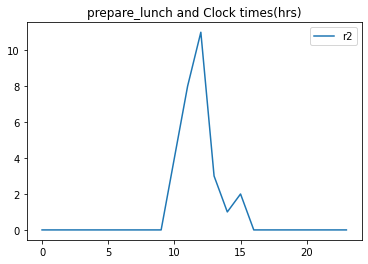

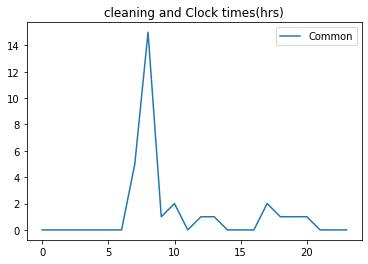

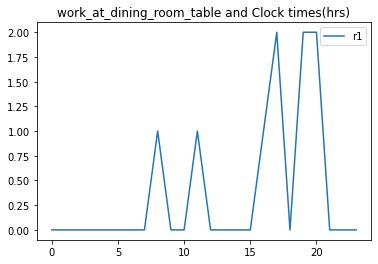

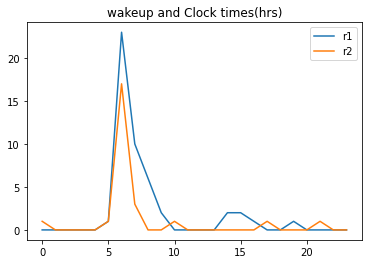

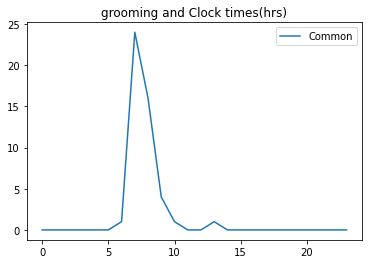

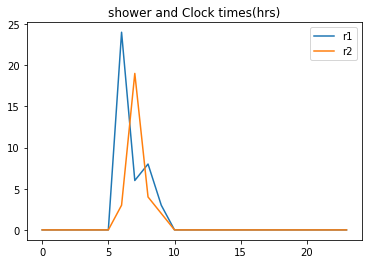

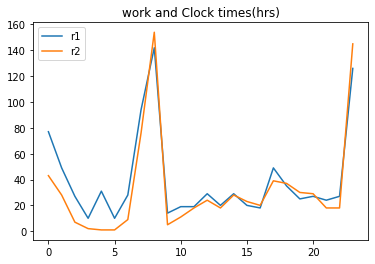

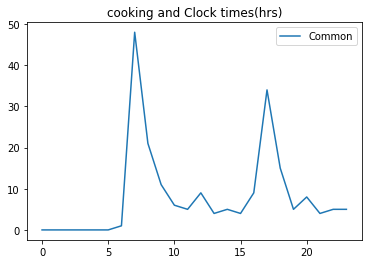

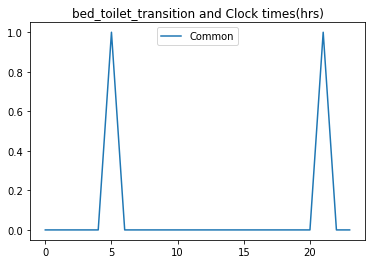

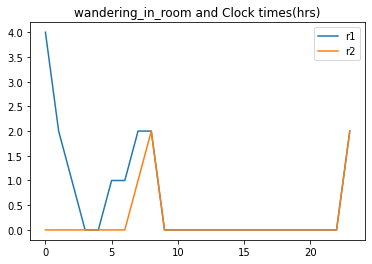

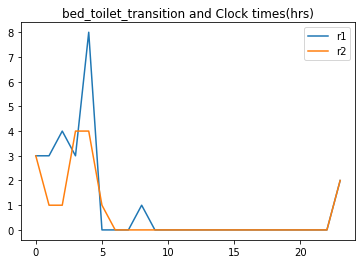

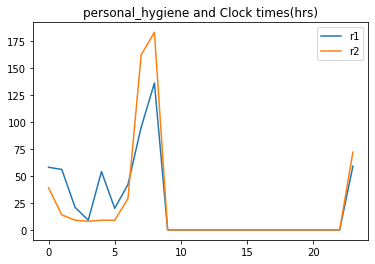

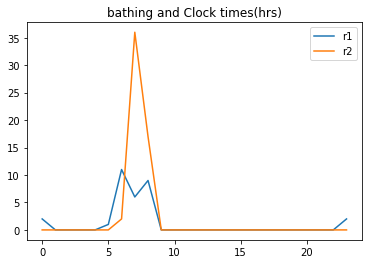

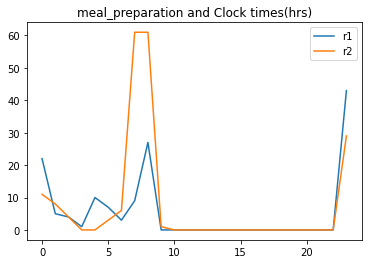

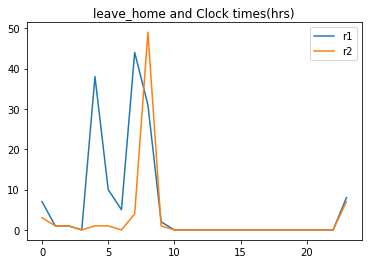

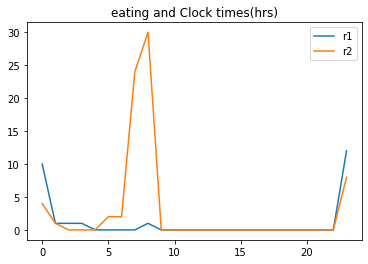

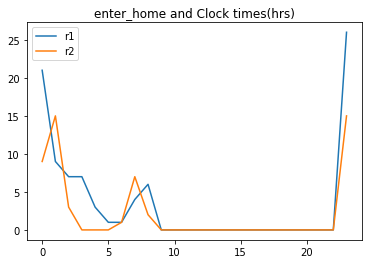

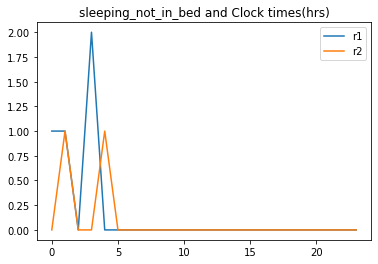

In [44]:
done=[]
raw_activities_cnt=0
for i in activities:
    if i not in done:
        raw_activities_cnt+=1
        if i.startswith('r1') or i.startswith('r2'):
            if 'r1'+i[2:] in activities:
                plt.plot(list(range(0,24)),[x for x in clock_times_r1['r1'+i[2:]]],label='r1')
                done.append('r1'+i[2:])
            if 'r2'+i[2:] in activities:
                plt.plot(list(range(0,24)),[x for x in clock_times_r2['r2'+i[2:]]],label='r2')
                done.append('r2'+i[2:])
        else:
            plt.plot(list(range(0,24)),[x for x in clock_times_gen[i]],label='Common')
            done.append(i)
        plt.legend()
        if i.startswith('r1') or i.startswith('r2'):
            plt.title(i[3:]+' and Clock times(hrs)')
        else:
            plt.title(i+' and Clock times(hrs)')                            
        plt.show()

### Concurrent activities

Catch such instances finding nested begin and ends

In [45]:
def con_acts(df):
    print(df.head())
    response = ''
    conc_actvts=[]
    stack_list = []
    stack = deque()
    for i in range(len(df)-1):
        if len(stack)==0 and df.iloc[i,4]==df.iloc[i+1,4] and df.iloc[i,5]=='begin' and df.iloc[i+1,5]=='end':
            i+=1
            continue
        else:
            if df.iloc[i,5]=='begin':
                stack.append(df.iloc[i,4])
                stack_list.append(df.iloc[i,4][3:]+' '+df.iloc[i,5]+' '+str(df.iloc[i,6])+' '+df.iloc[i,4][:2])
            else:
                if len(stack):
                    stack.pop()
                    stack_list.append(df.iloc[i,4][3:]+' '+df.iloc[i,5]+' '+str(df.iloc[i,6])+' '+df.iloc[i,4][:2])
                if len(stack)==0:
                    if len(stack_list):
                        response = response+'\n'+str(stack_list)[0:]
                        conc_actvts.append(list(stack_list))
                        stack_list=[]
    return conc_actvts

In [46]:
d1 = pd.DataFrame(con_acts(df_resident1))
d2 = pd.DataFrame(con_acts(df_resident2))

        Date             Time Sensor Status          Activity Begin_or_End  \
0 2009-02-02  07:15:16.575809   M035     ON  r1_bed_to_toilet        begin   
1 2009-02-02  07:21:03.792759   M041    OFF  r1_bed_to_toilet          end   
2 2009-02-02  07:21:04.014729   M040    OFF          r1_groom        begin   
3 2009-02-02  07:38:33.946559   M036     ON          r1_groom          end   
5 2009-02-02  07:45:27.324569   M032     ON      r1_breakfast        begin   

                   Date_Time Weekday  
0 2009-02-02 07:15:16.575809  Monday  
1 2009-02-02 07:21:03.792759  Monday  
2 2009-02-02 07:21:04.014729  Monday  
3 2009-02-02 07:38:33.946559  Monday  
5 2009-02-02 07:45:27.324569  Monday  
         Date             Time Sensor Status          Activity Begin_or_End  \
4  2009-02-02  07:44:12.597919   M049     ON  r2_bed_to_toilet        begin   
6  2009-02-02    07:46:55.1379   M048    OFF  r2_bed_to_toilet          end   
8  2009-02-02   10:19:25.51405   M050     ON      r2_breakfa

In [47]:
d1.head(10)

,0,1,2,3,4,5,6,7
0,bed_to_toilet begin 2009-02-06 07:33:49.097174 r1,groom begin 2009-02-06 07:34:24.770119 r1,bed_to_toilet end 2009-02-06 07:53:46.392519 r1,groom end 2009-02-06 07:54:01.092629 r1,None,None,None,None
1,work_at_dining_room_table begin 2009-02-06 20:...,work_at_computer begin 2009-02-06 20:01:32.016...,work_at_dining_room_table end 2009-02-06 22:10...,work_at_computer end 2009-02-06 22:12:25.05150...,None,None,None,None
2,groom begin 2009-02-09 07:49:25.491709 r1,bed_to_toilet begin 2009-02-09 07:49:25.491709 r1,bed_to_toilet end 2009-02-09 07:52:27.222409 r1,groom end 2009-02-09 08:09:04.647429 r1,None,None,None,None
3,sleep begin 2009-02-16 22:41:07.074547 r1,bed_to_toilet begin 2009-02-16 22:58:02.099424 r1,bed_to_toilet end 2009-02-16 23:00:52.623939 r1,sleep end 2009-02-17 08:34:56.004499 r1,None,None,None,None
4,work_at_computer begin 2009-02-20 04:27:50.008...,bed_to_toilet begin 2009-02-20 05:28:16.131059 r1,bed_to_toilet end 2009-02-20 05:43:40.147259 r1,groom begin 2009-02-20 05:44:35.026936 r1,groom end 2009-02-20 06:02:00.003709 r1,work_at_computer end 2009-02-20 06:23:24.01269...,None,None
5,sleep begin 2009-03-02 20:37:55.038661 r1,bed_to_toilet begin 2009-03-02 22:18:03.486279 r1,bed_to_toilet end 2009-03-02 22:20:20.017629 r1,sleep end 2009-03-03 07:08:42.073494 r1,None,None,None,None
6,work_at_computer begin 2009-03-03 17:00:05.022...,work_at_dining_room_table begin 2009-03-03 17:...,work_at_dining_room_table end 2009-03-03 20:41...,work_at_computer end 2009-03-03 22:02:24.91128...,None,None,None,None
7,work_at_computer begin 2009-03-06 14:25:37.182...,work_at_dining_room_table begin 2009-03-06 16:...,work_at_dining_room_table end 2009-03-06 17:04...,work_at_computer end 2009-03-06 17:06:04.02677...,None,None,None,None
8,work_at_dining_room_table begin 2009-03-10 19:...,work_at_computer begin 2009-03-10 19:41:40.130...,work_at_computer end 2009-03-10 22:17:35.00464...,sleep begin 2009-03-10 22:21:48.600029 r1,work_at_dining_room_table end 2009-03-10 22:41...,sleep end 2009-03-11 07:46:43.057989 r1,None,None
9,work_at_computer begin 2009-03-11 18:21:06.794...,work_at_dining_room_table begin 2009-03-11 19:...,work_at_computer end 2009-03-11 22:07:54.06389...,work_at_dining_room_table end 2009-03-11 22:09...,None,None,None,None


In [48]:
d1.to_csv('con_resident_1.csv')
d2.to_csv('con_resident_2.csv')

In [49]:
def con_acts_rule_mining(df):
    conc_actvts=[]
    stack_list = []
    stack = deque()
    for i in range(len(df)-1):
        if len(stack)==0 and df.iloc[i,4]==df.iloc[i+1,4] and df.iloc[i,5]=='begin' and df.iloc[i+1,5]=='end':
            i+=1
            continue
        else:
            if df.iloc[i,5]=='begin':
                stack.append(df.iloc[i,4])
                stack_list.append(df.iloc[i,4][3:])
            else:
                if len(stack):
                    stack.pop()
                if len(stack)==0:
                    if len(stack_list):
                        conc_actvts.append(list(stack_list))
                        stack_list=[]
    return conc_actvts

In [50]:
records_1 = con_acts_rule_mining(df_resident1)
records_2 = con_acts_rule_mining(df_resident2)

In [51]:
records_1[:10]

[['bed_to_toilet', 'groom'],
 ['work_at_dining_room_table', 'work_at_computer'],
 ['groom', 'bed_to_toilet'],
 ['sleep', 'bed_to_toilet'],
 ['work_at_computer', 'bed_to_toilet', 'groom'],
 ['sleep', 'bed_to_toilet'],
 ['work_at_computer', 'work_at_dining_room_table'],
 ['work_at_computer', 'work_at_dining_room_table'],
 ['work_at_dining_room_table', 'work_at_computer', 'sleep'],
 ['work_at_computer', 'work_at_dining_room_table']]

In [52]:
records_2[:10]

[['work_at_computer', 'groom'],
 ['sleep', 'bed_to_toilet'],
 ['prepare_lunch', 'watch_tv', 'prepare_dinner'],
 ['prepare_lunch', 'watch_tv'],
 ['prepare_dinner', 'watch_tv'],
 ['prepare_dinner', 'watch_tv'],
 ['prepare_dinner', 'watch_tv', 'work_at_computer'],
 ['sleep', 'bed_to_toilet'],
 ['watch_tv', 'prepare_dinner', 'work_at_computer'],
 ['sleep', 'bed_to_toilet']]

## Interleaving activities detection  

In [53]:
### Logic

# An activity will be generally put to a pause because it cannot be performed in background.
# So, we label few activities to be foreground only tasks and then classify concurrent tasks as interleaving tasks or not.

In [54]:
acts = []
for i in activities:
    if i[2]=='_':
        acts.append(i[3:])
    else:
        acts.append(i)
acts=list(np.unique(acts))

In [55]:
acts

['bathing',
 'bed_to_toilet',
 'bed_toilet_transition',
 'breakfast',
 'cleaning',
 'cooking',
 'eating',
 'enter_home',
 'groom',
 'grooming',
 'leave_home',
 'meal_preparation',
 'personal_hygiene',
 'prepare_dinner',
 'prepare_lunch',
 'shower',
 'sleep',
 'sleeping_not_in_bed',
 'wakeup',
 'wandering_in_room',
 'watch_tv',
 'work',
 'work_at_computer',
 'work_at_dining_room_table']

In [56]:
foreground_only_acts=['bathing',
 'bed_to_toilet',
 'bed_toilet_transition',
 'breakfast',
 'cleaning',
 'eating',
 'enter_home',
 'groom',
 'grooming',
 'leave_home',
 'shower',
 'sleep',
 'sleeping_not_in_bed',
 'wakeup',
 'wandering_in_room']

In [57]:
def foreground_background_acts(df):
    foreground_acts = []
    background_acts = []
    stack_list = []
    stack = deque()
    for i in range(len(df)-1):
        if len(stack)==0 and df.iloc[i,4]==df.iloc[i+1,4] and df.iloc[i,5]=='begin' and df.iloc[i+1,5]=='end':
            i+=1
            continue
        else:
            if df.iloc[i,5]=='begin':
                stack.append(df.iloc[i,4])
                stack_list.append([df.iloc[i,4][3:],df.iloc[i,5],str(df.iloc[i,6])])
            else:
                if len(stack):
                    stack.pop()
                    stack_list.append([df.iloc[i,4][3:],df.iloc[i,5],str(df.iloc[i,6])])
                if len(stack)==0:
                    if len(stack_list):
                        foreground_acts.append(list(x for x in stack_list if x[0] in foreground_only_acts))
                        background_acts.append(list(x for x in stack_list if x[0] not in foreground_only_acts))
                        stack_list=[]
    return pd.DataFrame(foreground_acts),pd.DataFrame(background_acts)

In [58]:
resident1_fr,resident1_br=foreground_background_acts(df_resident1)
resident1_fr.head()

,0,1,2,3,4,5,6,7
0,"[bed_to_toilet, begin, 2009-02-06 07:33:49.097...","[groom, begin, 2009-02-06 07:34:24.770119]","[bed_to_toilet, end, 2009-02-06 07:53:46.392519]","[groom, end, 2009-02-06 07:54:01.092629]",None,None,None,None
1,None,None,None,None,None,None,None,None
2,"[groom, begin, 2009-02-09 07:49:25.491709]","[bed_to_toilet, begin, 2009-02-09 07:49:25.491...","[bed_to_toilet, end, 2009-02-09 07:52:27.222409]","[groom, end, 2009-02-09 08:09:04.647429]",None,None,None,None
3,"[sleep, begin, 2009-02-16 22:41:07.074547]","[bed_to_toilet, begin, 2009-02-16 22:58:02.099...","[bed_to_toilet, end, 2009-02-16 23:00:52.623939]","[sleep, end, 2009-02-17 08:34:56.004499]",None,None,None,None
4,"[bed_to_toilet, begin, 2009-02-20 05:28:16.131...","[bed_to_toilet, end, 2009-02-20 05:43:40.147259]","[groom, begin, 2009-02-20 05:44:35.026936]","[groom, end, 2009-02-20 06:02:00.003709]",None,None,None,None


In [59]:
resident1_br.head()

,0,1,2,3
0,None,None,None,None
1,"[work_at_dining_room_table, begin, 2009-02-06 ...","[work_at_computer, begin, 2009-02-06 20:01:32....","[work_at_dining_room_table, end, 2009-02-06 22...","[work_at_computer, end, 2009-02-06 22:12:25.05..."
2,None,None,None,None
3,None,None,None,None
4,"[work_at_computer, begin, 2009-02-20 04:27:50....","[work_at_computer, end, 2009-02-20 06:23:24.01...",None,None


In [60]:
resident2_fr,resident2_br=foreground_background_acts(df_resident2)
resident2_fr.head()

,0,1,2,3,4,5,6,7
0,"[groom, begin, 2009-02-09 17:21:48.456279]","[groom, end, 2009-02-09 17:40:30.861749]",None,None,None,None,None,None
1,"[sleep, begin, 2009-02-10 00:26:54.552649]","[bed_to_toilet, begin, 2009-02-10 07:54:46.454...","[bed_to_toilet, end, 2009-02-10 07:56:52.040404]","[sleep, end, 2009-02-10 09:21:46.180769]",None,None,None,None
2,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None


In [61]:
resident2_br.head()

,0,1,2,3,4,5
0,"[work_at_computer, begin, 2009-02-09 17:01:21....","[work_at_computer, end, 2009-02-09 18:32:38.09...",None,None,None,None
1,None,None,None,None,None,None
2,"[prepare_lunch, begin, 2009-02-10 13:05:24.034...","[watch_tv, begin, 2009-02-10 17:03:57.048589]","[prepare_lunch, end, 2009-02-10 17:42:23.033889]","[prepare_dinner, begin, 2009-02-10 18:09:13.41...","[prepare_dinner, end, 2009-02-10 18:45:55.006678]","[watch_tv, end, 2009-02-10 19:00:29.036859]"
3,"[prepare_lunch, begin, 2009-02-11 15:35:35.433...","[watch_tv, begin, 2009-02-11 15:41:22.000447]","[prepare_lunch, end, 2009-02-11 16:14:02.000023]","[watch_tv, end, 2009-02-11 16:14:04.053778]",None,None
4,"[prepare_dinner, begin, 2009-02-12 19:51:18.03...","[watch_tv, begin, 2009-02-12 20:28:47.007079]","[watch_tv, end, 2009-02-12 21:12:06.130579]","[prepare_dinner, end, 2009-02-12 21:15:23.079571]",None,None


In [62]:
resident1_fr.to_csv('resident_1_intrlvd.csv')
resident2_fr.to_csv('resident_2_intrlvd.csv')

In [63]:
def foreground_background_acts_mining(df):
    foreground_acts = []
    stack_list = []
    stack = deque()
    for i in range(len(df)-1):
        if len(stack)==0 and df.iloc[i,4]==df.iloc[i+1,4] and df.iloc[i,5]=='begin' and df.iloc[i+1,5]=='end':
            i+=1
            continue
        else:
            if df.iloc[i,5]=='begin':
                stack.append(df.iloc[i,4])
                stack_list.append(df.iloc[i,4][3:])
            else:
                if len(stack):
                    stack.pop()
                if len(stack)==0:
                    if len(stack_list):
                        tmp = list(x for x in stack_list if x in foreground_only_acts)
                        if len(tmp)>1:
                            foreground_acts.append(list(np.unique(tmp)))
                        stack_list=[]
    return foreground_acts

In [64]:
records1_fr=foreground_background_acts_mining(df_resident1)
print(records1_fr)

[['bed_to_toilet', 'groom'], ['bed_to_toilet', 'groom'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'groom'], ['bed_to_toilet', 'sleep'], ['groom', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['breakfast', 'groom'], ['bed_to_toilet', 'sleep'], ['shower', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep']]


In [65]:
records2_fr=foreground_background_acts_mining(df_resident2)
print(records2_fr)

[['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'groom'], ['bed_to_toilet', 'breakfast'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'groom', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_to_toilet', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep'], ['bed_toilet_transition', 'sleep']]


## Sequential activities

In [66]:
only_begins = df_resident1[df_resident1['Begin_or_End']=='begin']

In [67]:
sequential_sets1 = []
sequential_data1 = []
for i in range(len(only_begins)-1):
    act1 = only_begins.iloc[i,4][3:] if only_begins.iloc[i,4][2:3]=='_' else only_begins.iloc[i,4]
    act2 = only_begins.iloc[i+1,4][3:] if only_begins.iloc[i+1,4][2:3]=='_' else only_begins.iloc[i+1,4]
    sequential_sets1.append([act1,act2])
    sequential_data1.append([only_begins.iloc[i,4][3:]+' '+only_begins.iloc[i,5]+' '+str(only_begins.iloc[i,6])+' '+only_begins.iloc[i,4][:2],only_begins.iloc[i+1,4][3:]+' '+only_begins.iloc[i+1,5]+' '+str(only_begins.iloc[i+1,6])+' '+only_begins.iloc[i+1,4][:2]])
print(sequential_sets1[:15])

[['bed_to_toilet', 'groom'], ['groom', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'groom'], ['groom', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'bed_to_toilet']]


In [68]:
pd.DataFrame(sequential_data1).to_csv("sequential1.csv")

In [69]:
only_begins = df_resident2[df_resident2['Begin_or_End']=='begin']

In [71]:
sequential_data2 = []
sequential_sets2 = []
for i in range(len(only_begins)-1):
    act1 = only_begins.iloc[i,4][3:] if only_begins.iloc[i,4][2:3]=='_' else only_begins.iloc[i,4]
    act2 = only_begins.iloc[i+1,4][3:] if only_begins.iloc[i+1,4][2:3]=='_' else only_begins.iloc[i+1,4]
    sequential_sets2.append([act1,act2])
    sequential_data2.append([only_begins.iloc[i,4][3:]+' '+only_begins.iloc[i,5]+' '+str(only_begins.iloc[i,6])+' '+only_begins.iloc[i,4][:2],only_begins.iloc[i+1,4][3:]+' '+only_begins.iloc[i+1,5]+' '+str(only_begins.iloc[i+1,6])+' '+only_begins.iloc[i+1,4][:2]])
print(sequential_sets2[:15])

[['bed_to_toilet', 'breakfast'], ['breakfast', 'groom'], ['groom', 'watch_tv'], ['watch_tv', 'work_at_computer'], ['work_at_computer', 'prepare_dinner'], ['prepare_dinner', 'groom'], ['groom', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'groom'], ['groom', 'prepare_lunch'], ['prepare_lunch', 'prepare_dinner'], ['prepare_dinner', 'watch_tv'], ['watch_tv', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'groom']]


In [72]:
pd.DataFrame(sequential_data2).to_csv("sequential2.csv")

## Rule mining

#### Concurrent rules 

In [73]:
from efficient_apriori import apriori
itemset_1, rules_1 = apriori(records_1, min_support=0.03, min_confidence=0.65)
itemset_2, rules_2 = apriori(records_2, min_support=0.03, min_confidence=0.65)

In [74]:
# TODO: Remove instances of interleaved from Concurrent activity instances

In [75]:
print(rules_1)
print('----------------------------------')
print(rules_2)

[{work_at_dining_room_table} -> {work_at_computer}, {personal_hygiene} -> {bathing}, {bathing} -> {personal_hygiene}, {bed_toilet_transition} -> {sleep}, {watch_tv} -> {eating}, {eating} -> {watch_tv}]
----------------------------------
[{groom} -> {work_at_computer}, {bed_to_toilet} -> {sleep}, {prepare_dinner} -> {watch_tv}, {prepare_lunch} -> {watch_tv}, {personal_hygiene} -> {bathing}, {bathing} -> {personal_hygiene}, {eating} -> {watch_tv}, {bed_toilet_transition} -> {sleep}]


#### Interleaved rules

In [76]:
from efficient_apriori import apriori
itemset_1, rules_1 = apriori(records1_fr, min_support=0.03, min_confidence=0.65)
itemset_2, rules_2 = apriori(records2_fr, min_support=0.03, min_confidence=0.65)

In [77]:
print(rules_1)
print('----------------------------------')
print(rules_2)

[{breakfast} -> {groom}, {shower} -> {sleep}, {bed_toilet_transition} -> {sleep}]
----------------------------------
[{bed_to_toilet} -> {sleep}, {groom} -> {bed_to_toilet}, {breakfast} -> {bed_to_toilet}, {bed_toilet_transition} -> {sleep}, {groom, sleep} -> {bed_to_toilet}]


#### Sequential activities

In [78]:
from efficient_apriori import apriori
itemset_1, rules_1 = apriori(sequential_sets1, min_support=0.01, min_confidence=0.55)
itemset_2, rules_2 = apriori(sequential_sets2, min_support=0.01, min_confidence=0.55)

In [79]:
print(rules_1)
print('----------------------------------')
print(rules_2)

[{bathing} -> {personal_hygiene}]
----------------------------------
[{shower} -> {work}, {bathing} -> {personal_hygiene}, {bed_toilet_transition} -> {sleep}]


## Sensor - Time mapping

In [80]:
df.head()

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
0,2009-02-02,07:15:16.575809,M035,ON,r1_bed_to_toilet,begin,2009-02-02 07:15:16.575809,Monday
1,2009-02-02,07:21:03.792759,M041,OFF,r1_bed_to_toilet,end,2009-02-02 07:21:03.792759,Monday
2,2009-02-02,07:21:04.014729,M040,OFF,r1_groom,begin,2009-02-02 07:21:04.014729,Monday
3,2009-02-02,07:38:33.946559,M036,ON,r1_groom,end,2009-02-02 07:38:33.946559,Monday
4,2009-02-02,07:44:12.597919,M049,ON,r2_bed_to_toilet,begin,2009-02-02 07:44:12.597919,Monday


In [81]:
df['Hour']=df['Time'].apply(lambda x: x[0:2])
df['Hour']=df['Hour'].astype('int')
sensor_time = pd.crosstab(df['Sensor'],df['Hour'])
sensor_time

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Sensor,,,,,,,,,,,,,,,,,,,,,
AD1-A,0,0,0,0,0,0,0,1,2,3,...,0,0,1,4,5,0,2,1,0,0
AD1-B,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
D001,30,24,10,7,1,1,1,14,12,0,...,0,0,0,0,0,0,0,0,0,42
D003,20,7,4,5,6,7,18,54,61,1,...,0,0,0,0,0,0,0,0,0,17
D004,10,10,4,6,28,6,10,27,55,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
T002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
T003,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [82]:
import seaborn as sns

<AxesSubplot:xlabel='Hour', ylabel='Sensor'>

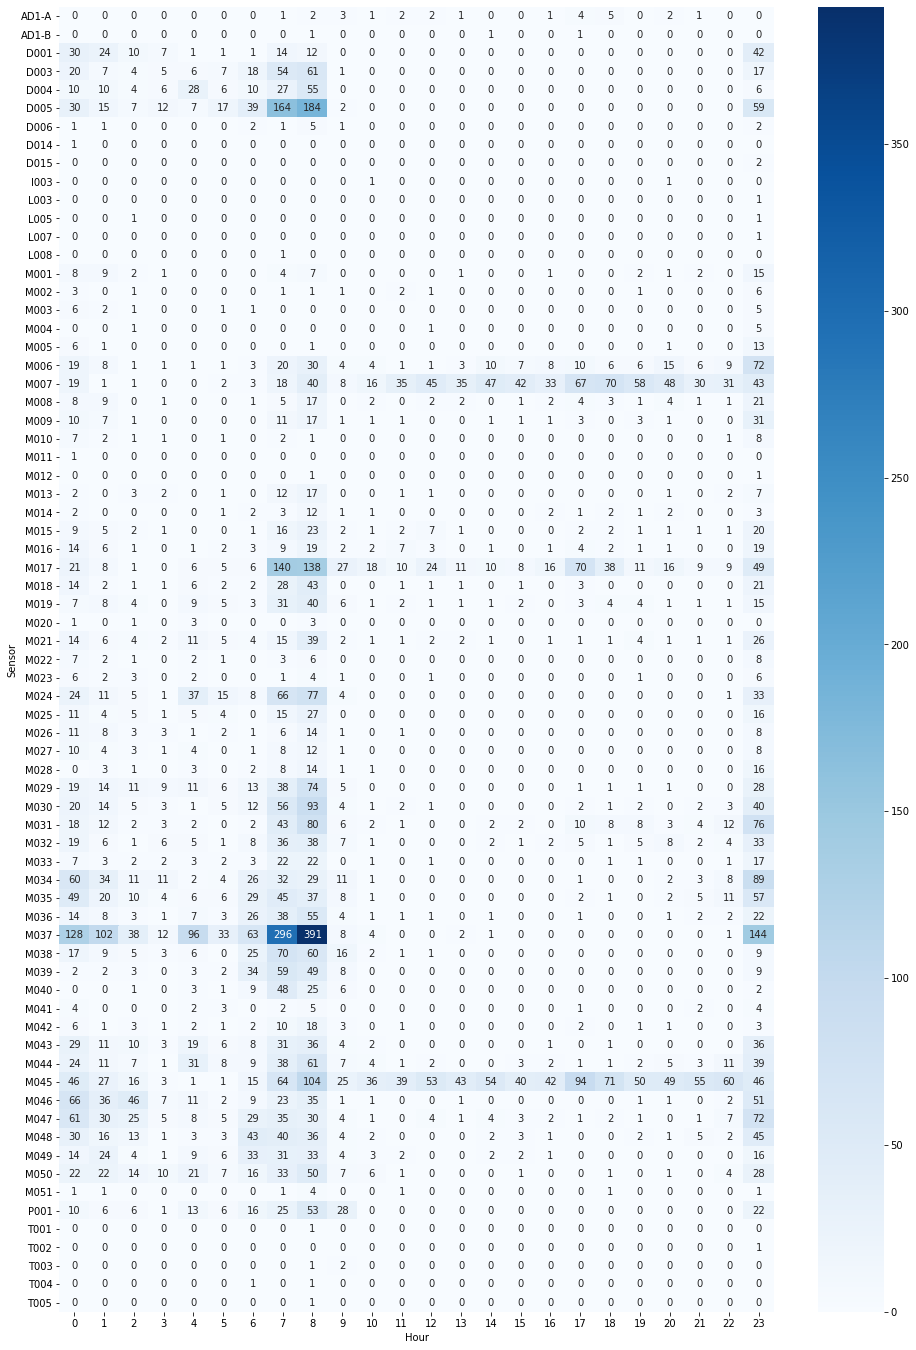

In [83]:
f, ax = plt.subplots(figsize=(16, 24))
sns.heatmap(sensor_time,cmap='Blues',annot=True, fmt='d')

### Visualisation of activity patterns

In [84]:
import plotly.express as px

df = px.data.tips()
print(df)
type(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


pandas.core.frame.DataFrame

In [85]:
fig = px.parallel_categories(df)
fig.show()

In [86]:
print(sequential_sets1)

[['bed_to_toilet', 'groom'], ['groom', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'groom'], ['groom', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'groom'], ['groom', 'sleep'], ['sleep', 'bed_to_toilet'], ['bed_to_toilet', 'groom'], ['groom', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'work_at_dining_room_table'], ['work_at_dining_room_table', 'work_at_computer'], ['work_at_computer', 'sleep'], ['sleep', 'groom'], ['groom', 'bed_to_toilet'], ['bed_to_toilet', 'breakfast'], ['breakfast', 'work_at_computer'], ['work_at_computer', 'work_at_computer'], ['work_at_comput

In [87]:
dseq1 = pd.DataFrame(sequential_sets1, columns = ['Activity1', 'Activity2'])
fig = px.parallel_categories(dseq1, )
fig.show()

In [88]:
dseq2 = pd.DataFrame(sequential_sets2, columns = ['Activity1', 'Activity2'])
fig = px.parallel_categories(dseq2)
fig.show()